In [14]:
# OBS: The limit was reduced to 10, to show the outputs in github.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'Your API KEY',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-11-05T18:25:00.829Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 8809}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10520, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [15]:
# Checking data type
type(data)

dict

In [16]:
import pandas as pd
import os

# Display all columns
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)

In [17]:
# Normalize the data for easier visualization
df = pd.json_normalize(data['data'])

# Adds a new 'timestamp' column to the DataFrame 'df' and sets its values to the current date and time.
df['timestamp'] = pd.to_datetime('now')

# Showing the new column
df

C:\Users\Pichau\AppData\Local\Temp\ipykernel_428\2491101271.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10520,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19534212.00000,19534212.00000,False,NaN,1,NaN,NaN,None,2023-11-05T18:23:00.000Z,35049.54974,11453475161.15879,18.42020,-0.30029,0.81832,0.92458,25.50431,36.43695,20.36605,684665335070.40479,51.87400,736040544480.55005,None,2023-11-05T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:25:07.922944
1,1027,Ethereum,ETH,ethereum,7706,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120268913.44932,120268913.44932,True,NaN,2,NaN,NaN,None,2023-11-05T18:23:00.000Z,1897.36269,7961376631.99118,51.33940,0.12610,3.26311,5.29694,15.24869,16.23450,3.92863,228193749555.56342,17.28260,228193749555.56000,None,2023-11-05T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:25:07.922944
2,825,Tether USDt,USDT,tether,65114,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,85367759448.50455,88623656723.66614,True,NaN,3,NaN,NaN,None,2023-11-05T18:22:00.000Z,1.00071,25751595434.31637,23.07610,-0.02115,-0.00221,0.03982,0.03839,0.11534,0.18228,85427995879.42072,6.47000,88686190551.55000,None,2023-11-05T18:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-05 18:25:07.922944
3,1839,BNB,BNB,bnb,1740,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151702869.50983,151702869.50983,False,NaN,4,NaN,NaN,None,2023-11-05T18:22:00.000Z,242.39112,389844788.07714,46.60760,-0.25032,2.40422,6.73761,13.40838,12.82078,0.34744,36771428510.26502,2.78600,36771428510.27000,None,2023-11-05T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:25:07.922944
4,52,XRP,XRP,xrp,1131,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53615837759.00000,99988316618.00000,False,NaN,5,NaN,NaN,None,2023-11-05T18:23:00.000Z,0.64940,1698310021.19985,94.13200,-0.39206,5.92536,16.10219,24.03176,29.87699,5.56701,34817961873.08876,2.63700,64939695672.75000,None,2023-11-05T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:25:07.922944
5,3408,USDC,USDC,usd-coin,14784,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24592145958.83429,24592145958.83429,False,NaN,6,NaN,NaN,None,2023-11-05T18:22:00.000Z,1.00000,2991005976.82716,19.75180,0.00671,-0.02429,-0.01506,0.00324,-0.03008,-0.00023,24592054858.94510,1.86100,24592054858.95000,None,2023-11-05T18:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-05 18:25:07.922944
6,5426,Solana,SOL,solana,541,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,420089797.74805,561772811.41490,True,NaN,7,NaN,NaN,None,2023-11-05T18:23:00.000Z,40.90286,914695527.52154,-37.71050,-1.08645,-0.80697,23.85412,73.33770,110.14808,77.83281,17182873560.35540,1.30200,22978113822.17000,None,2023-11-05T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:25:07.922944
7,2010,Cardano,ADA,cardano,959,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35255548958.65800,36320189326.90800,False,NaN,8,NaN,NaN,None,2023-11-05T18:22:00.000Z,0.34758,297947312.97502,30.44500,-0.34625,7.05282,16.68975,30.94257,35.21787,20.22902,12254090856.46659,0.92810,15641058069.69000,None,2023-11-05T18:22:00.000Z,NaN,NaN,N

In [21]:
# Creating the API function
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'10',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'Your API key',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        

    # Normalize the data for easier visualization
    df = pd.json_normalize(data['data'])

    # Adds a new 'timestamp' column to the DataFrame 'df' and sets its values to the current date and time
    df['timestamp'] = pd.to_datetime('now')

    # Shows the df
    df 
    
    # Check if the file 'API.csv' exists at the specified path.
    # If it doesn't exist, create a new CSV file with the DataFrame 'df' and include column names in the header.
    if not os.path.isfile(r'c:\Users\Pichau\Desktop\WebScrapCrypto\API.csv'):
        df.to_csv(r'c:\Users\Pichau\Desktop\WebScrapCrypto\API.csv', header='column_names')
    # If the file already exists, append the DataFrame 'df' to the existing CSV file without writing column names to the header.
    else:
        df.to_csv(r'c:\Users\Pichau\Desktop\WebScrapCrypto\API.csv', mode='a', header=False)



In [22]:
# Simple way to automate the script
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('API Runner completed!')
    sleep(60)  # sleep for 1 minute
exit()


{'status': {'timestamp': '2023-11-05T18:27:49.432Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 8809}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10520, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Pichau\AppData\Local\Temp\ipykernel_428\3585953000.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-11-05T18:28:49.796Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 8809}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10520, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Pichau\AppData\Local\Temp\ipykernel_428\3585953000.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


KeyboardInterrupt: 

In [25]:
# Visualizing the csv
df86 = pd.read_csv(r'c:\Users\Pichau\Desktop\WebScrapCrypto\API.csv')
df86


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10520,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19534212.00000,19534212.00000,False,NaN,1,NaN,NaN,NaN,2023-11-05T18:27:00.000Z,35046.87383,11479779045.12964,18.95160,-0.27986,0.81151,0.90046,25.36577,36.62085,20.33385,684613063399.63208,51.89450,735984350502.19995,NaN,2023-11-05T18:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:27:48.474267
1,1,1027,Ethereum,ETH,ethereum,7706,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120268913.44932,120268913.44932,True,NaN,2,NaN,NaN,NaN,2023-11-05T18:27:00.000Z,1897.43637,7967014075.94013,51.62880,0.12042,3.25154,5.34637,15.17138,16.49476,3.96009,228202610633.55521,17.29750,228202610633.56000,NaN,2023-11-05T18:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:27:48.474267
2,2,825,Tether USDt,USDT,tether,65114,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,85367759448.50455,88623656723.66614,True,NaN,3,NaN,NaN,NaN,2023-11-05T18:26:00.000Z,1.00068,25784363322.49091,23.29690,-0.01728,-0.00819,0.01707,0.04027,0.11231,0.12317,85425542803.43646,6.47510,88683643916.08000,NaN,2023-11-05T18:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-05 18:27:48.474267
3,3,1839,BNB,BNB,bnb,1740,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151702869.50983,151702869.50983,False,NaN,4,NaN,NaN,NaN,2023-11-05T18:26:00.000Z,242.31269,389725405.05882,46.60300,-0.18991,2.42778,6.67550,13.41492,12.97147,0.28954,36759529943.31438,2.78510,36759529943.31000,NaN,2023-11-05T18:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:27:48.474267
4,4,52,XRP,XRP,xrp,1131,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53615837759.00000,99988316618.00000,False,NaN,5,NaN,NaN,NaN,2023-11-05T18:27:00.000Z,0.64885,1699394451.99313,94.40220,-0.40848,5.90474,15.97195,23.88873,29.98271,5.47835,34788546705.36344,2.63690,64884832839.39000,NaN,2023-11-05T18:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:27:48.474267
5,5,3408,USDC,USDC,usd-coin,14784,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24592145958.83429,24592145958.83429,False,NaN,6,NaN,NaN,NaN,2023-11-05T18:26:00.000Z,0.99994,2997207869.67813,20.18070,-0.01842,-0.02982,-0.03876,-0.00396,-0.02801,-0.05777,24590602480.62108,1.86330,24590602480.62000,NaN,2023-11-05T18:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-05 18:27:48.474267
6,6,5426,Solana,SOL,solana,541,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,420089797.74805,561772811.41490,True,NaN,7,NaN,NaN,NaN,2023-11-05T18:27:00.000Z,40.89329,916035855.36966,-37.61530,-1.00905,-0.78949,23.80872,73.13415,110.59021,78.16424,17178853958.38092,1.30170,22972738535.47000,NaN,2023-11-05T18:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:27:48.474267
7,7,2010,Cardano,ADA,cardano,959,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35255548958.65800,36320189326.90800,False,NaN,8,NaN,NaN,NaN,2023-11-05T18:26:00.000Z,0.34729,298213089.12523,30.40890,-0.41969,6.97719,16.51593,30.86470,35.32274,20.15853,12243774375.05344,0.92810,15627890166.27000,NaN,2023-11-05T18:26:00.0

In [26]:
# Transforming the data

# Making the numbers more readable
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10520,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19534212.00000,19534212.00000,False,NaN,1,NaN,NaN,None,2023-11-05T18:28:00.000Z,35045.54815,11493404227.70634,19.31680,-0.27080,0.79791,1.02315,25.31885,36.55076,20.33306,684587167213.95496,51.89260,735956511145.31995,None,2023-11-05T18:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:28:48.837706
1,1027,Ethereum,ETH,ethereum,7706,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120268913.44932,120268913.44932,True,NaN,2,NaN,NaN,None,2023-11-05T18:28:00.000Z,1897.09112,7997639864.02343,52.89210,0.11554,3.22047,5.44377,15.10452,16.43613,3.90501,228161087464.55777,17.29430,228161087464.56000,None,2023-11-05T18:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:28:48.837706
2,825,Tether USDt,USDT,tether,65114,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,85367759448.50455,88623656723.66614,True,NaN,3,NaN,NaN,None,2023-11-05T18:27:00.000Z,1.00071,25787135117.94110,23.36460,0.00383,-0.00761,0.04264,0.03262,0.11857,0.19603,85428341979.93257,6.47540,88686549852.21001,None,2023-11-05T18:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-05 18:28:48.837706
3,1839,BNB,BNB,bnb,1740,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151702869.50983,151702869.50983,False,NaN,4,NaN,NaN,None,2023-11-05T18:27:00.000Z,242.29972,389733228.13030,46.58820,-0.20636,2.43483,6.67280,13.40175,12.95236,0.27671,36757562469.46258,2.78630,36757562469.46000,None,2023-11-05T18:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:28:48.837706
4,52,XRP,XRP,xrp,1131,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53615837759.00000,99988316618.00000,False,NaN,5,NaN,NaN,None,2023-11-05T18:28:00.000Z,0.64875,1701126817.36210,94.74760,-0.50101,5.90872,15.98905,23.80292,29.89718,5.43797,34783422950.74019,2.63650,64875276419.42000,None,2023-11-05T18:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:28:48.837706
5,3408,USDC,USDC,usd-coin,14784,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24592145958.83429,24592145958.83429,False,NaN,6,NaN,NaN,None,2023-11-05T18:28:00.000Z,0.99985,3000447947.83012,20.62510,-0.02057,-0.04624,-0.02442,-0.01361,-0.02280,-0.03342,24588527967.35196,1.86390,24588527967.35000,None,2023-11-05T18:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-05 18:28:48.837706
6,5426,Solana,SOL,solana,541,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,420089797.74805,561772811.41490,True,NaN,7,NaN,NaN,None,2023-11-05T18:28:00.000Z,40.89788,915783416.97522,-37.60300,-0.94911,-0.85501,23.84730,73.08245,110.31615,78.30588,17180781323.37794,1.30230,22975315939.78000,None,2023-11-05T18:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 18:28:48.837706
7,2010,Cardano,ADA,cardano,959,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35255548958.65800,36320189326.90800,False,NaN,8,NaN,NaN,None,2023-11-05T18:27:00.000Z,0.34729,298197882.68982,30.41910,-0.41499,6.97440,16.48146,30.86818,35.32368,20.19641,12244034810.86593,0.92810,15628222585.19000,None,2023-11-05T18:27:00.000Z,NaN,NaN,

In [43]:
# Group the data by the 'name' column, without sorting the groups
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                                      'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                      'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
                                      'quote.USD.percent_change_90d']].mean()

df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,,
Bitcoin,-0.27080,0.79791,1.02315,25.31885,25.31885,36.55076,20.33306
Ethereum,0.11554,3.22047,5.44377,15.10452,15.10452,16.43613,3.90501
Tether USDt,0.00383,-0.00761,0.04264,0.03262,0.03262,0.11857,0.19603
BNB,-0.20636,2.43483,6.67280,13.40175,13.40175,12.95236,0.27671
XRP,-0.50101,5.90872,15.98905,23.80292,23.80292,29.89718,5.43797
USDC,-0.02057,-0.04624,-0.02442,-0.01361,-0.01361,-0.02280,-0.03342
Solana,-0.94911,-0.85501,23.84730,73.08245,73.08245,110.31615,78.30588
Cardano,-0.41499,6.97440,16.48146,30.86818,30.86818,35.32368,20.19641
Dogecoin,-0.06160,3.51895,1.62890,15.42244,15.42244,11.78360,-3.42014


In [44]:
# Stack the columns in the DataFrame df3 to create a multi-index Series
df4 = df3.stack()
df4


name                                     
Bitcoin      quote.USD.percent_change_1h     -0.27080
             quote.USD.percent_change_24h     0.79791
             quote.USD.percent_change_7d      1.02315
             quote.USD.percent_change_30d    25.31885
             quote.USD.percent_change_30d    25.31885
             quote.USD.percent_change_60d    36.55076
             quote.USD.percent_change_90d    20.33306
Ethereum     quote.USD.percent_change_1h      0.11554
             quote.USD.percent_change_24h     3.22047
             quote.USD.percent_change_7d      5.44377
             quote.USD.percent_change_30d    15.10452
             quote.USD.percent_change_30d    15.10452
             quote.USD.percent_change_60d    16.43613
             quote.USD.percent_change_90d     3.90501
Tether USDt  quote.USD.percent_change_1h      0.00383
             quote.USD.percent_change_24h    -0.00761
             quote.USD.percent_change_7d      0.04264
             quote.USD.percent_change_30

In [45]:
# Checking df4 type
type(df4)


pandas.core.series.Series

In [46]:
# Convert the Series df4 into a DataFrame with a specified column name 'values'
df5 = df4.to_frame(name='values')
df5


values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.27080
            quote.USD.percent_change_24h   0.79791
            quote.USD.percent_change_7d    1.02315
            quote.USD.percent_change_30d  25.31885
            quote.USD.percent_change_30d  25.31885
            quote.USD.percent_change_60d  36.55076
            quote.USD.percent_change_90d  20.33306
Ethereum    quote.USD.percent_change_1h    0.11554
            quote.USD.percent_change_24h   3.22047
            quote.USD.percent_change_7d    5.44377
            quote.USD.percent_change_30d  15.10452
            quote.USD.percent_change_30d  15.10452
            quote.USD.percent_change_60d  16.43613
            quote.USD.percent_change_90d   3.90501
Tether USDt quote.USD.percent_change_1h    0.00383
            quote.USD.percent_change_24h  -0.00761
            quote.USD.percent_change_7d    0.04264
            quote.USD.percent_change_30d   0.03262
            quote.USD.percent_change_30d   0.03262
            quote.USD.percent_change_60d   0.11857
            quote.USD.percent_change_90d   0.19603
BNB         quote.USD.percent_change_1h   -0.20636
            quote.USD.percent_change_24h   2.43483
            quote.USD.percent_change_7d    6.67280
            quote.USD.percent_change_30d  13.40175
            quote.USD.percent_change_30d  13.40175
            quote.USD.percent_change_60d  12.95236
            quote.USD.percent_change_90d   0.27671
XRP         quote.USD.percent_change_1h   -0.50101
            quote.USD.percent_change_24h   5.90872
            quote.USD.percent_change_7d   15.98905
            quote.USD.percent_change_30d  23.80292
            quote.USD.percent_change_30d  23.80292
            quote.USD.percent_change_60d  29.89718
            quote.USD.percent_change_90d   5.43797
USDC        quote.USD.percent_change_1h   -0.02057
            quote.USD.percent_change_24h  -0.04624
            quote.USD.percent_change_7d   -0.02442
            quote.USD.percent_change_30d  -0.01361
            quote.USD.percent_change_30d  -0.01361
            quote.USD.percent_change_60d  -0.02280
            quote.USD.percent_change_90d  -0.03342
Solana      quote.USD.percent_change_1h   -0.94911
            quote.USD.percent_change_24h  -0.85501
            quote.USD.percent_change_7d   23.84730
            quote.USD.percent_change_30d  73.08245
            quote.USD.percent_change_30d  73.08245
            quote.USD.percent_change_60d 110.31615
            quote.USD.percent_change_90d  78.30588
Cardano     quote.USD.percent_change_1h   -0.41499
            quote.USD.percent_change_24h   6.97440
            quote.USD.percent_change_7d   16.48146
            quote.USD.percent_change_30d  30.86818
            quote.USD.percent_change_30d  30.86818
            quote.USD.percent_change_60d  35.32368
            quote.USD.percent_change_90d  20.19641
Dogecoin    quote.USD.percent_change_1h   -0.06160
            quote.USD.percent_change_24h   3.51895
            quote.USD.percent_change_7d    1.62890
            quote.USD.percent_change_30d  15.42244
            quote.USD.percent_change_30d  15.42244
            quote.USD.percent_change_60d  11.78360
            quote.USD.percent_change_90d  -3.42014
TRON        quote.USD.percent_change_1h   -0.20384
            quote.USD.percent_change_24h   0.90412
            quote.USD.percent_change_7d    3.38006
            quote.USD.percent_change_30d  12.93422
            quote.USD.percent_change_30d  12.93422
            quote.USD.percent_change_60d  26.18686
            quote.USD.percent_change_90d  28.47182

In [47]:
# Checking df5 type
type(df5)


pandas.core.frame.DataFrame

In [48]:
# Counting df5 values
df5.count()


values    70
dtype: int64

In [49]:
# Create a new index as a range of values from 0 to 29 and assign it to the 'index' variable(could be variable)
index = pd.Index(range(70))
# Reset the index of the DataFrame df5 and store the result in a new DataFrame df6
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.27080
1,Bitcoin,quote.USD.percent_change_24h,0.79791
2,Bitcoin,quote.USD.percent_change_7d,1.02315
3,Bitcoin,quote.USD.percent_change_30d,25.31885
4,Bitcoin,quote.USD.percent_change_30d,25.31885
5,Bitcoin,quote.USD.percent_change_60d,36.55076
6,Bitcoin,quote.USD.percent_change_90d,20.33306
7,Ethereum,quote.USD.percent_change_1h,0.11554
8,Ethereum,quote.USD.percent_change_24h,3.22047
9,Ethereum,quote.USD.percent_change_7d,5.44377


In [50]:
# Rename the 'level_1' column to 'percent_change' in the DataFrame df6 and store the result in a new DataFrame df7
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.27080
1,Bitcoin,quote.USD.percent_change_24h,0.79791
2,Bitcoin,quote.USD.percent_change_7d,1.02315
3,Bitcoin,quote.USD.percent_change_30d,25.31885
4,Bitcoin,quote.USD.percent_change_30d,25.31885
5,Bitcoin,quote.USD.percent_change_60d,36.55076
6,Bitcoin,quote.USD.percent_change_90d,20.33306
7,Ethereum,quote.USD.percent_change_1h,0.11554
8,Ethereum,quote.USD.percent_change_24h,3.22047
9,Ethereum,quote.USD.percent_change_7d,5.44377


In [51]:
# Replace values in the 'percent_change' column
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
                                                       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], 
                                                      ['1h', '24h', '7d', '30d', '60d', '90d'])

df7


,name,percent_change,values
0,Bitcoin,1h,-0.27080
1,Bitcoin,24h,0.79791
2,Bitcoin,7d,1.02315
3,Bitcoin,30d,25.31885
4,Bitcoin,30d,25.31885
5,Bitcoin,60d,36.55076
6,Bitcoin,90d,20.33306
7,Ethereum,1h,0.11554
8,Ethereum,24h,3.22047
9,Ethereum,7d,5.44377


In [ ]:
# Installing seaborn
%pip install seaborn


In [41]:
# Importing visualization libs
import seaborn as sns
import matplotlib.pyplot as plt


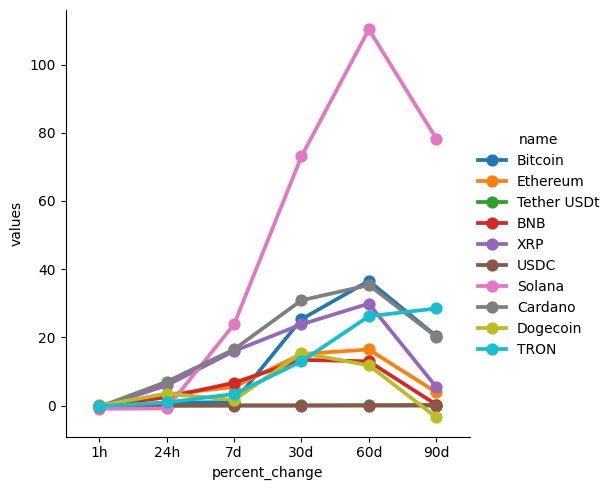

In [52]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [54]:
# Create a new DataFrame df8 by selecting specific columns from df
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

# OBS2: I run the api for 1 minute, so it only shows 1 timestamp.


,name,quote.USD.price,timestamp
0,Bitcoin,35045.54815,2023-11-05 18:28:48.837706


In [57]:
# Credits to Alex the Analyst, his youtube channel: https://www.youtube.com/@AlexTheAnalyst
print('Thats all, folks!')

Thats all, folks!
